In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib.font_manager as fm  


In [2]:
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes', unicode_minus=False)

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=path, size=9)

## Top 5 물품 그래프

In [41]:
df = pd.read_csv('./data/new_sales4.csv', encoding='euc-kr')
df_mem = pd.read_csv('./data/Member_data5.csv',encoding='euc_kr')

In [40]:
def pants(x):
    if x in ['1단계', '2단계', '3단계', '4단계', '5단계', '6단계', '7단계']:
        return ('기저귀')
    else:
        return(x)

In [41]:
df['물품대분류'] = df['물품대분류'].apply(lambda x:pants(x))

In [44]:
df_mem = df_mem[['유입경로','고객번호']].drop_duplicates()

In [45]:
df2 = pd.merge(df, df_mem[['유입경로','고객번호']], on='고객번호',how='left')

In [46]:
df2 = df2[df2['유입경로'].isin(['인스타그램', '네이버블로그'])]

In [47]:
df3= df2[df2['물품대분류'].isin(df2['물품대분류'].value_counts().head(5).index)]

In [48]:
df4 = df3.groupby(['유입경로', '물품대분류'])['주문번호'].count().reset_index()

In [50]:
df4.to_csv('./data/유입경로별_물품대분류_count.csv', encoding='euc-kr', index=False)

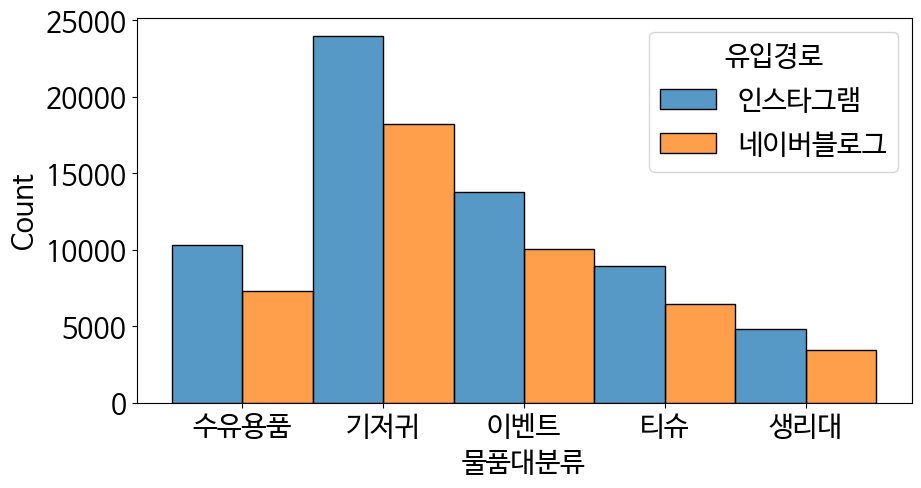

In [15]:
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
sns.histplot(data=df3, x='물품대분류', hue='유입경로', multiple='dodge', binwidth=0.5)
plt.show()

## 이탈율 모델 결과 그래프

In [52]:
df = pd.read_csv('./data/Member_data5.csv', encoding='euc-kr')

In [53]:
df.chun = df.chun.astype('object')

In [54]:
df = df.rename(columns = {'chun':'Churn'})

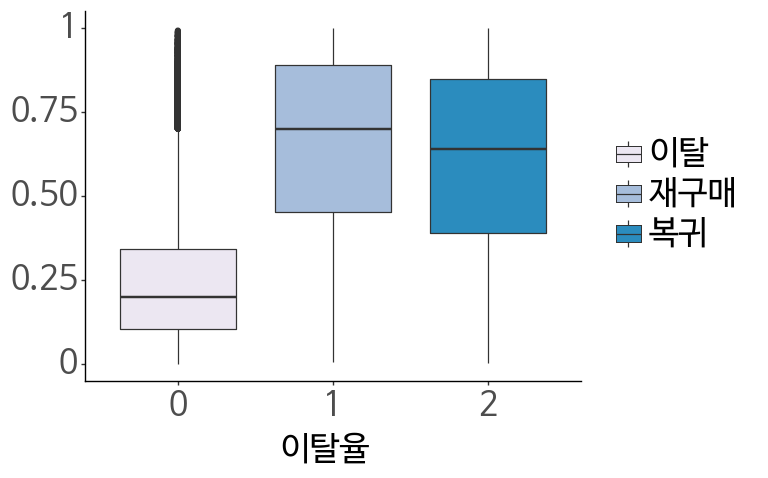

<ggplot: (8741451500828)>

In [56]:
(
    ggplot(df, aes(x='Churn', y = 'churn_predict1'))
    + geom_boxplot(aes(fill='Churn')) 
    + theme_classic()
    + theme(text=element_text(size=24, fontproperties=font),
            axis_title_y=element_blank(),
            legend_title=element_blank(),
            legend_key_size=24)
    + scale_fill_brewer(palette='PuBu', labels=['이탈', '재구매', '복귀'])
    + xlab('이탈율')
 )

## 기존고객 vs 신규고객

In [121]:
df = pd.read_csv('/home/piai/workspace/bigdata/Project/data/이탈율.csv', encoding='euc-kr')

In [122]:
df['월'] = df['월'].astype(str)
df['월'] = df['월'].apply(lambda x:x[:4] + '-' + x[4:])
df['월'] = df['월'].apply(lambda x:np.datetime64(x, 'M'))

In [123]:
x_data = [df['재구매_평균결제금액'], df['신규_평균결제금액']]
bar_df = pd.DataFrame(x_data).T.iloc[1:]
bar_df = bar_df.rename(columns={'재구매_평균결제금액':'기존고객', '신규_평균결제금액':'신규고객'})

In [105]:
bar_df.mean().to_csv('./data/기존고객_신규고객_결제금액.csv', encoding='euc-kr', index=False)

In [124]:
bar_df = bar_df.stack().reset_index().rename(columns={0:'결제금액'})

In [130]:
bar_df = bar_df.rename(columns={0:'결제금액'})
bar_df.head()

,level_0,level_1,결제금액
0,1,기존고객,28770.576316
1,1,신규고객,23498.764508
2,2,기존고객,22905.794776
3,2,신규고객,20561.254720
4,3,기존고객,25626.267036


/home/piai/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


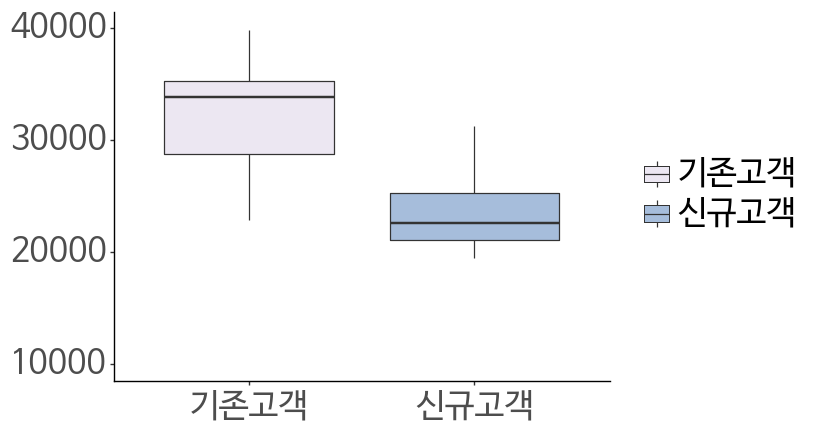

<ggplot: (8741452635007)>

In [135]:
(
    ggplot(bar_df, aes(x='level_1', y = '결제금액'))
    + geom_boxplot(aes(fill='level_1')) 
    + theme_classic()
    + theme(text=element_text(size=24, fontproperties=font),
            axis_title_y=element_blank(),
            legend_title=element_blank(),
            legend_key_size=24)
    + scale_fill_brewer(palette='PuBu')
    + xlab('')
    + ylim([10000, 40000])
 )

In [131]:
## Barplot 재구매자, 신규구매자
plt.figure(figsize=(5,8))
plt.rc('font', size=15)
sns.barplot(y=bar_df.mean(), x=bar_df.columns)
# plt.bar(height=.mean(), x=bar_df.columns,
#         align='center', color=['#e35f62', 'y'], width=0.5, capsize=10,
#         edgecolor='lightgray', linewidth=3, yerr=bar_df.std())
#plt.savefig('./data/graph/재구매신규구매boxplot.png')
plt.show()

/tmp/ipykernel_31803/1656543084.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


ValueError: Grouper and axis must be same length

<Figure size 500x800 with 0 Axes>

## 고객, 이탈율 추이

In [65]:
df.head()

,월,전체결제수,이용고객수,신규고객수,재구매고객수,복귀고객수,신규_구매금액,재구매_구매금액,재구매_평균구매금액,신규_평균구매금액,신규_결제금액,재구매_결제금액,재구매_평균결제금액,신규_평균결제금액,이탈율
0,2019-01-01,4359,3264,3264,0,0,129393220,0,NaN,39642.530637,88867985,0,NaN,27226.711091,0.000000
1,2019-02-01,7156,5722,5342,380,0,178244750,15373560,40456.736842,33366.669787,125530400,10932819,28770.576316,23498.764508,0.000000
2,2019-03-01,9579,7746,6674,1072,0,192509390,34270050,31968.330224,28844.679353,137225814,24555012,22905.794776,20561.254720,0.000000
3,2019-04-01,8922,7067,5226,1805,36,185576000,65315090,36185.645429,35510.141600,132418753,46255412,25626.267036,25338.452545,0.446998
4,2019-05-01,8949,6826,4765,1862,199,208214560,83075750,44616.407089,43696.654774,149197281,59507838,31959.096670,31311.076810,0.674589


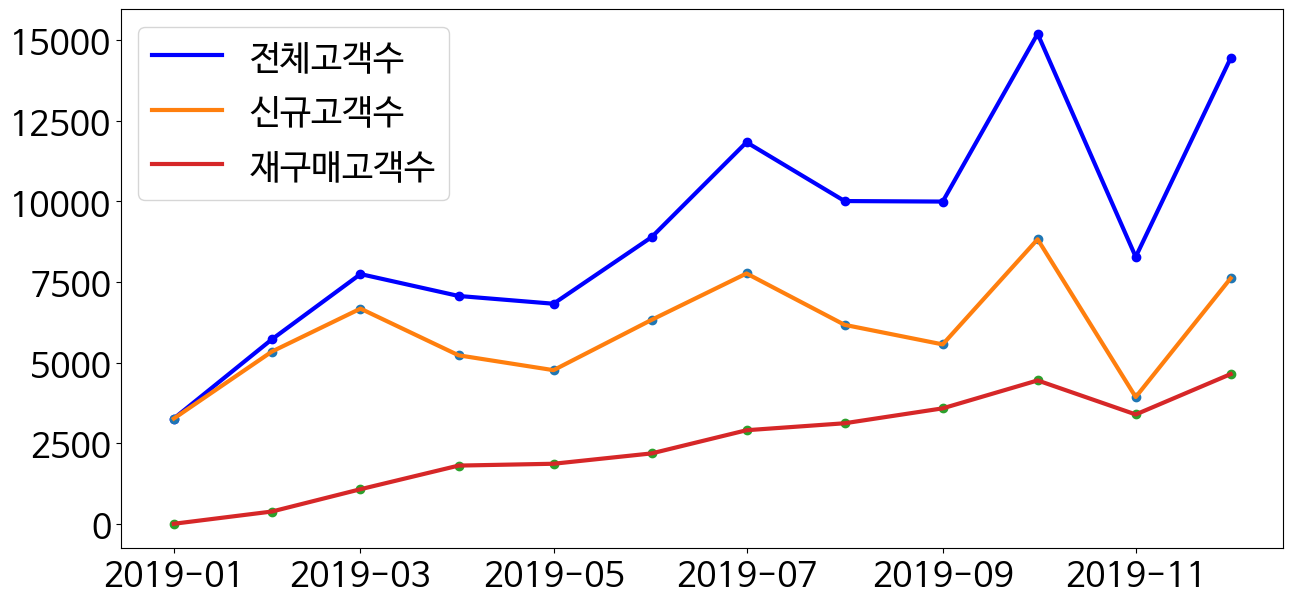

In [99]:
df = df.iloc[:12]
## PLT line graph
plt.figure(figsize=(15,7))
plt.rc('font', size=25)
plt.plot(df['월'], df['이용고객수'], color='b', linewidth=3, label = '전체고객수')
plt.plot(df['월'], df['이용고객수'], 'o', color='b', linewidth=10)
plt.plot(df['월'], df['신규고객수'], 'o', linewidth=10)
plt.plot(df['월'], df['신규고객수'], linewidth=3, label = '신규고객수')
plt.plot(df['월'], df['재구매고객수'], 'o', linewidth=10)
plt.plot(df['월'], df['재구매고객수'], linewidth=3, label = '재구매고객수')
plt.legend()
plt.show()

(0.0, 1.0)

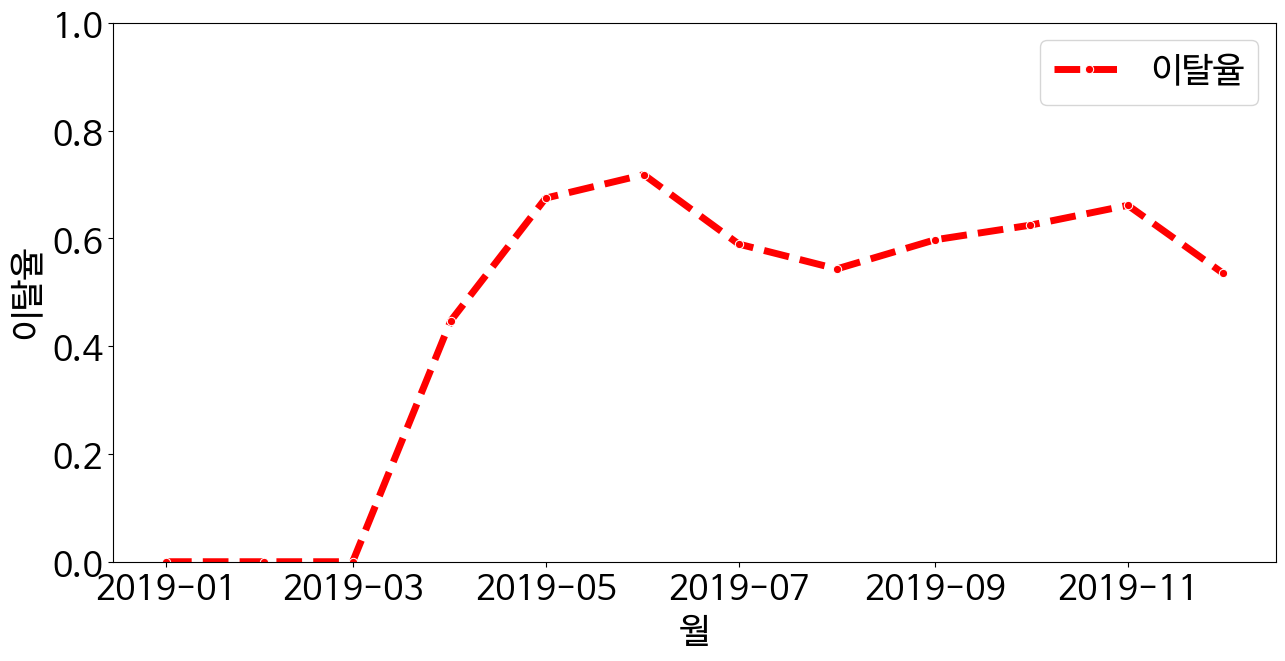

In [101]:
plt.rc('font', size=25)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='월', y='이탈율', label='이탈율',
                   marker='o', linestyle='dashed', color='red',
                   linewidth=5)
plt.ylim((0, 1))


## 배송기간

In [140]:
df_sale = pd.read_csv('./data/new_sales4.csv',encoding='euc-kr')
df_sale['배송완료일'] = df_sale['배송완료일'].astype('datetime64')
df_sale['구매일'] = df_sale['구매일'].astype('datetime64')
df_sale['배송기간'] = df_sale['배송완료일'] - df_sale['구매일']

In [ ]:
df = df.iloc[:12]
## PLT line graph
plt.figure(figsize=(15,7))
plt.rc('font', size=25)
plt.plot(df['월'], df['이용고객수'], color='b', linewidth=3, label = '전체고객수')
plt.plot(df['월'], df['이용고객수'], 'o', color='b', linewidth=10)
plt.plot(df['월'], df['신규고객수'], 'o', linewidth=10)
plt.plot(df['월'], df['신규고객수'], linewidth=3, label = '신규고객수')
plt.plot(df['월'], df['재구매고객수'], 'o', linewidth=10)
plt.plot(df['월'], df['재구매고객수'], linewidth=3, label = '재구매고객수')
plt.legend()
plt.show()

In [156]:
df_sale =df_sale[~(df_sale['구매일'] == '2019-04-27')]

In [174]:
df_sale['구매일'] = pd.to_datetime(df_sale['구매일'])

/tmp/ipykernel_31803/3348177583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [175]:
df_sale['구매일'].dtypes

dtype('<M8[ns]')

In [177]:
plt.rc('font', size=20)
plt.figure(figsize=(15,7))
sns.lineplot(data=df_sale.groupby('구매일')['배송기간'].mean, x='구매일', y='배송기간')
plt.ylim([])
plt.title('')

ValueError: Could not interpret value `구매일` for parameter `x`

<Figure size 1500x700 with 0 Axes>

In [171]:
df_sale['구매일'].to_period('W')

TypeError: unsupported Type Int64Index

In [169]:
df_sale['구매일'].to_period('W')

TypeError: unsupported Type Int64Index

In [ ]:
sns.lineplot(data = df_sale, x='구매일', y='배송기간')
sns.lineplot(data=df_sale.groupby('구매일')['배송기간'].mean, x='구매일', y='배송기간')

In [5]:
df = pd.read_csv('./data/Member_data6.csv',encoding='euc-kr')

In [8]:
df.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       'recendancy', 'frequency', 'monetary', 'rfm', '총구매금액', '첫주문일', '가입일',
       '첫주문까지일', '첫구매물품', '첫결제금액', '첫구매월령', 'chun', 'churn_predict1',
       'churn_predict0', '물품구매현황', 'kmeans'],
      dtype='object')

In [11]:
df['총구매금액'].sum()

4674692981

In [13]:
df.groupby('rfm')['총구매금액'].sum()/df['총구매금액'].sum()

rfm
1    0.079830
2    0.130192
3    0.117236
4    0.299807
5    0.372935
Name: 총구매금액, dtype: float64

In [33]:
((pd.DataFrame(df.groupby('rfm')['kmeans'].value_counts()).unstack())/len(df))*100

kmeans                                                   
kmeans         1         2         3         4         5          6
rfm                                                                
1       2.329781  4.856543  3.164609  1.683727  1.751732   6.795877
2       4.024060  8.199374  5.522530  2.916036  2.998112  11.407366
3       2.026100  4.138966  2.641669  1.472675  1.595788   5.740617
4       2.191424  4.600936  2.940659  1.612204  1.680209   6.187344
5       0.838346  1.859603  1.186582  0.616741  0.621431   2.398959

In [38]:
df = pd.read_csv('./data/new_sales4.csv', encoding='euc-kr')

In [43]:
df2 = df[df['물품대분류'] == '기저귀']

In [44]:
df2.group

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,기저귀,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24
10,201907222628031,2019-07-23,2019-07-24,2019-07-26,NaN,201812310749783,47360,34761,기저귀,[2019년형] 하기스 에어솔솔 썸머팬티 3단계 남아용 112매(팬티형),1.715942,201907,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199492,202002033368418,2020-02-04,2020-02-05,2020-02-07,2.0,201912281057954,52320,31516,기저귀,하기스 네이처메이드 2단계 남아 156매(밴드형),1.000000,202002,0.40
199501,202002223431991,2020-02-22,2020-02-23,2020-02-25,6.0,201912281057984,9500,7029,기저귀,더블하트 다기능 빨대 브러쉬,1.000000,202002,0.26
199505,20200706205941-05897002163,2020-07-07,2020-07-08,2020-07-11,2.0,201912281057997,6320,5930,기저귀,더블하트 열내림시트 6매 (EA),1.000000,202007,0.06
199507,20200727062932-97104092254,2020-07-27,2020-07-28,2020-07-30,2.0,201912281057997,2600,2570,기저귀,좋은느낌 순수 울트라 날개 대형 16개입 (EA),1.000000,202007,0.01
